In [4]:
#Steps
#Import libraries & data
#Encode labels
#Train-test split
#TF-IDF vectorization
#Train Logistic Regression
#Evaluate the model
#Save the model

In [5]:
#IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [6]:
# 2. LOAD DATA
df = pd.read_csv("C:/Users/hp/Desktop/ML PROJECTS FOLDER/SENTIMENT ANALYSIS PROJECT/Tweets.csv")

In [7]:
# Drop unused columns
df.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1, inplace=True)

In [8]:
# Clean tweets again if necessary
def clean_text(text):
    import re
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

In [9]:
# 3. ENCODE TARGET LABELS
df = df[df['airline_sentiment'].isin(['positive', 'neutral', 'negative'])]  # Just to be safe
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label'] = df['airline_sentiment'].map(label_mapping)

In [10]:
#TRAIN-TEST SPLIT

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
#TF-IDF VECTORIZATION
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
#TRAIN LOGISTIC REGRESSION
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [13]:
#EVALUATE MODEL
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_mapping.keys()))

Classification Report:

              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1835
     neutral       0.67      0.55      0.61       620
    positive       0.84      0.55      0.66       473

    accuracy                           0.80      2928
   macro avg       0.78      0.68      0.71      2928
weighted avg       0.79      0.80      0.78      2928



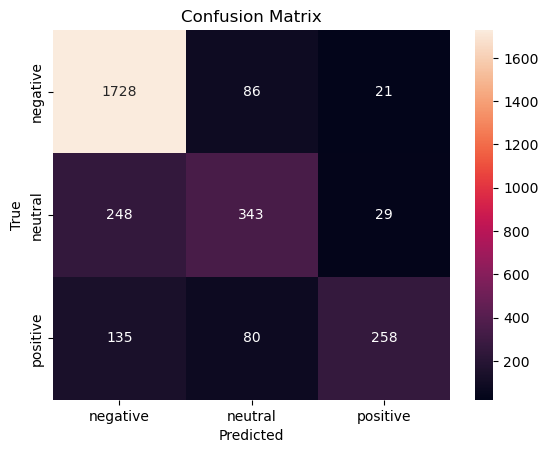

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
import os
import pickle

# Define the folder path for the app directory
app_folder_path = r"C:\Users\hp\Desktop\ML PROJECTS FOLDER\SENTIMENT ANALYSIS PROJECT\app"

# Create the directory if it doesn't exist
os.makedirs(app_folder_path, exist_ok=True)

# Now save the model and vectorizer

# Save the TF-IDF vectorizer (was named 'tfidf' not 'tfidf_vectorizer')
vectorizer_path = os.path.join(app_folder_path, "tfidf_vectorizer.pkl")
with open(vectorizer_path, 'wb') as f:
    pickle.dump(tfidf, f)

print("✅ Model and TF-IDF vectorizer saved successfully!")

✅ Model and TF-IDF vectorizer saved successfully!
